In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [5]:
(list(data_dir.glob('*/*.jpg')))

[PosixPath('/root/.keras/datasets/flower_photos/roses/2065522422_cfdd80044a_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/22093190909_77223e6f53_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/20596941736_f2c5f496cf.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/9633056561_6f1b7e8faf_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/7186509956_c37

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/2065522422_cfdd80044a_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/22093190909_77223e6f53_n.jpg')]

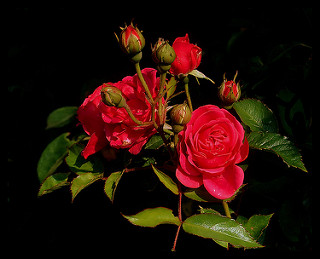

In [7]:
import PIL
PIL.Image.open(roses[0])

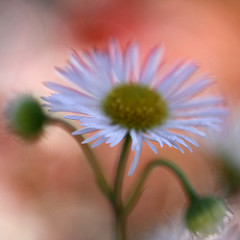

In [8]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(daisy[0])

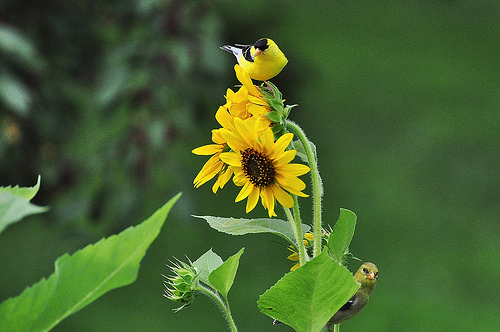

In [9]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(sunflowers[0])

In [10]:
batch_size=32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [12]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [13]:
train_ds.take(1) #  32 images

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

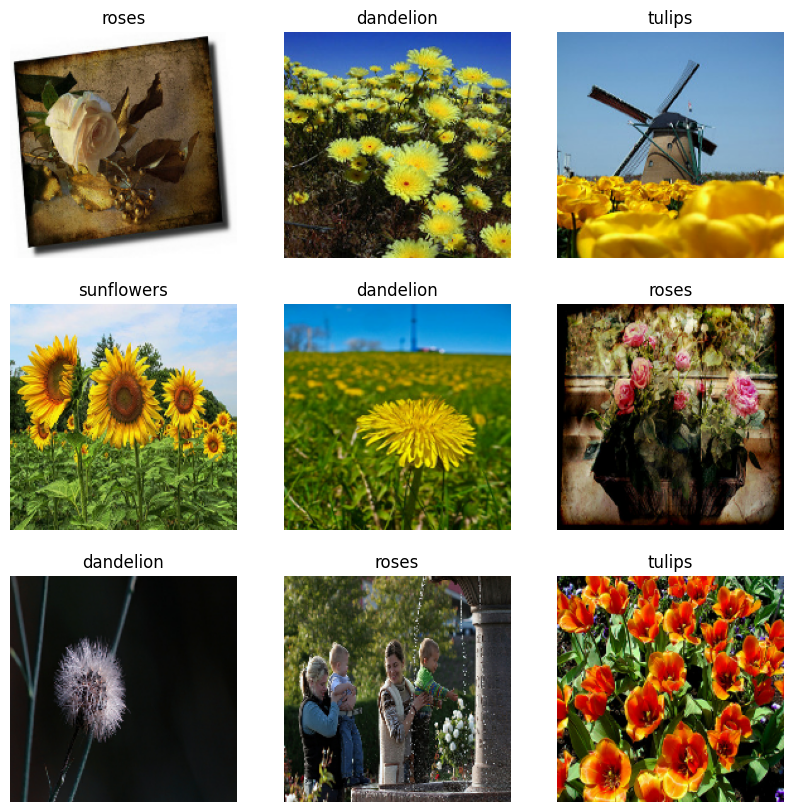

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
# AUTOTUNE
# cache() method
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
from tensorflow.keras.layers import Rescaling

In [17]:
normalization_layer = Rescaling(1/255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0059910296 0.99424833


# Data Augmentation

In [18]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom,MaxPooling2D, Flatten,Dropout

In [19]:
model = Sequential()
model.add(RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.1))
model.add(Rescaling(1/255))
model.add(Conv2D(16, 3, padding='same', activation='relu')) # yes padding
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu')) #  yes padding
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu')) # yes padding
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 4, 1, 0, 2, 2, 4, 0, 2, 4, 0, 2, 4, 0, 4, 1, 3, 2, 1, 1, 3, 2,
       1, 4, 4, 1, 3, 0, 2, 2, 2, 3], dtype=int32)>

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3772 - loss: 1.4626 - val_accuracy: 0.5150 - val_loss: 1.1634
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5612 - loss: 1.0847 - val_accuracy: 0.5422 - val_loss: 1.1216
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6187 - loss: 0.9594 - val_accuracy: 0.6185 - val_loss: 0.9632
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6507 - loss: 0.9062 - val_accuracy: 0.6608 - val_loss: 0.8595
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6694 - loss: 0.8213 - val_accuracy: 0.6621 - val_loss: 0.8751
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7078 - loss: 0.7922 - val_accuracy: 0.7030 - val_loss: 0.7884
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7267 - loss: 0.6980 - val_accuracy: 0.6935 - val_loss: 0.7878
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7334 - loss: 0.6817 - val_accuracy: 0.6989 - val_loss: 0

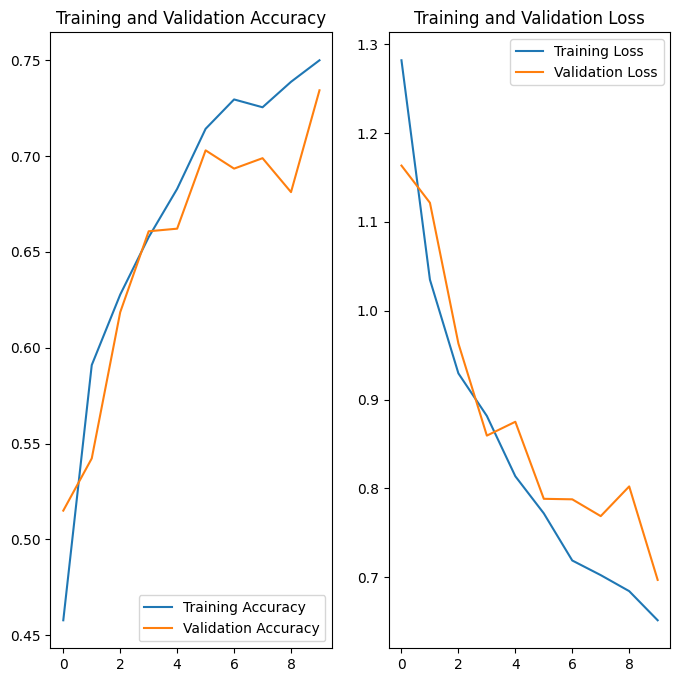

In [24]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# inference
#data for inference --> batch_size,h,w,no. of color channels
# (1,180,180,3)

In [25]:
img = tf.keras.utils.load_img("/content/sunflower.jpg", target_size=(img_height, img_width)) # Load into PIL format
img_array = tf.keras.utils.img_to_array(img) # convert the PIL format to array
img_array.shape

(180, 180, 3)

In [26]:
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array.shape

TensorShape([1, 180, 180, 3])

In [27]:
predictions = model.predict(img_array)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


array([[2.8702794e-04, 2.6610456e-02, 9.5809335e-03, 9.5152909e-01,
        1.1992551e-02]], dtype=float32)

In [28]:
np.argmax(predictions)

3

In [29]:
class_names[np.argmax(predictions)]

'sunflowers'